In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
# Install necessary packages
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityaakuskar","key":"9417d0f8c8780c807008befb31a7f9ca"}'}

In [3]:
# Move the Kaggle JSON file to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Create necessary directories inside the cloned repository
!mkdir -p breast_cancer_detection/datasets/CBIS-DDSM/csv
!mkdir -p breast_cancer_detection/datasets/CBIS-DDSM/jpeg

In [5]:
# CBIS-DDSM Dataset
!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset -p breast_cancer_detection/datasets/CBIS-DDSM --unzip

Dataset URL: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset
License(s): CC-BY-SA-3.0


In [6]:
# Organize CBIS-DDSM datase(Optional, if needs specific CSV or JPEG folders)
!mv breast_cancer_detection/datasets/CBIS-DDSM/*/*.csv breast_cancer_detection/datasets/CBIS-DDSM/csv
!mv breast_cancer_detection/datasets/CBIS-DDSM/*/*.jpg breast_cancer_detection/datasets/CBIS-DDSM/jpeg

mv: 'breast_cancer_detection/datasets/CBIS-DDSM/csv/calc_case_description_test_set.csv' and 'breast_cancer_detection/datasets/CBIS-DDSM/csv/calc_case_description_test_set.csv' are the same file
mv: 'breast_cancer_detection/datasets/CBIS-DDSM/csv/calc_case_description_train_set.csv' and 'breast_cancer_detection/datasets/CBIS-DDSM/csv/calc_case_description_train_set.csv' are the same file
mv: 'breast_cancer_detection/datasets/CBIS-DDSM/csv/dicom_info.csv' and 'breast_cancer_detection/datasets/CBIS-DDSM/csv/dicom_info.csv' are the same file
mv: 'breast_cancer_detection/datasets/CBIS-DDSM/csv/mass_case_description_test_set.csv' and 'breast_cancer_detection/datasets/CBIS-DDSM/csv/mass_case_description_test_set.csv' are the same file
mv: 'breast_cancer_detection/datasets/CBIS-DDSM/csv/mass_case_description_train_set.csv' and 'breast_cancer_detection/datasets/CBIS-DDSM/csv/mass_case_description_train_set.csv' are the same file
mv: 'breast_cancer_detection/datasets/CBIS-DDSM/csv/meta.csv' and 

In [2]:
import os
import pandas as pd
path = "/content/breast_cancer_detection/datasets/CBIS-DDSM"

for files in os.listdir(path):
    files_dir = os.path.join(path, files)

#     print(os.path.join(path, files))
#     print(f"file {files} has {len(os.listdir(files_dir))} files")

    if files == 'jpeg':   # to pass 6774 files
        pass
    else:
        for file in os.listdir(files_dir):
            print(file)

calc_case_description_train_set.csv
calc_case_description_test_set.csv
meta.csv
dicom_info.csv
mass_case_description_train_set.csv
mass_case_description_test_set.csv


In [3]:
dicom_df = pd.read_csv("/content/breast_cancer_detection/datasets/CBIS-DDSM/csv/dicom_info.csv")

In [4]:
dicom_df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [5]:
cropped_images = dicom_df[dicom_df.SeriesDescription=="cropped images"].image_path
cropped_images.head()

,image_path
0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...


In [6]:
full_mammogram = dicom_df[dicom_df.SeriesDescription=="full mammogram images"].image_path
full_mammogram.head()

,image_path
1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...


In [7]:
roi_mask = dicom_df[dicom_df.SeriesDescription=="ROI mask images"].image_path
roi_mask.head()

,image_path
5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...


In [8]:
# # delete dicom_df after finished use it
import gc
del dicom_df;    gc.collect()

0

In [9]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)

In [10]:
import matplotlib.pyplot as plt
import PIL
def plot_smaples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:5]):
        cropped_images_show = PIL.Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,5,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()

In [11]:
correct_dir = "../content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg"

In [12]:
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", correct_dir)
print('Cropped Images paths:')
print(cropped_images.iloc[0])

Cropped Images paths:
../content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg


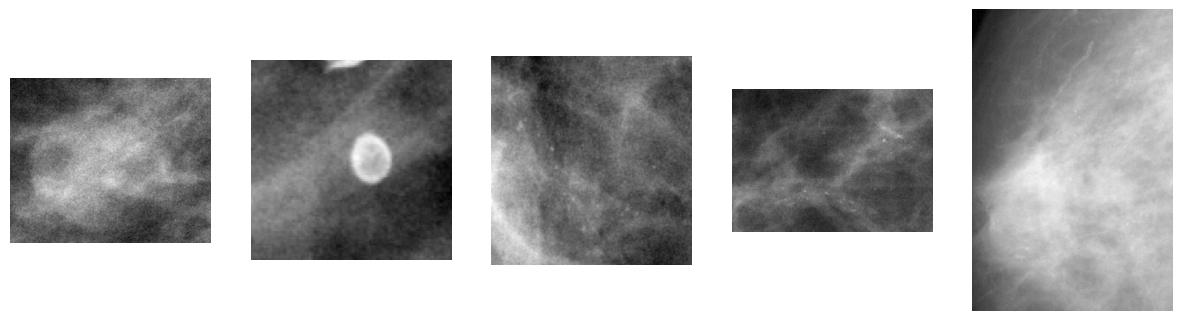

In [13]:
plot_smaples(cropped_images, 15, 15)

In [14]:
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", correct_dir)
print('\nFull mammo Images paths:')
print(full_mammogram.iloc[0])


Full mammo Images paths:
../content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg


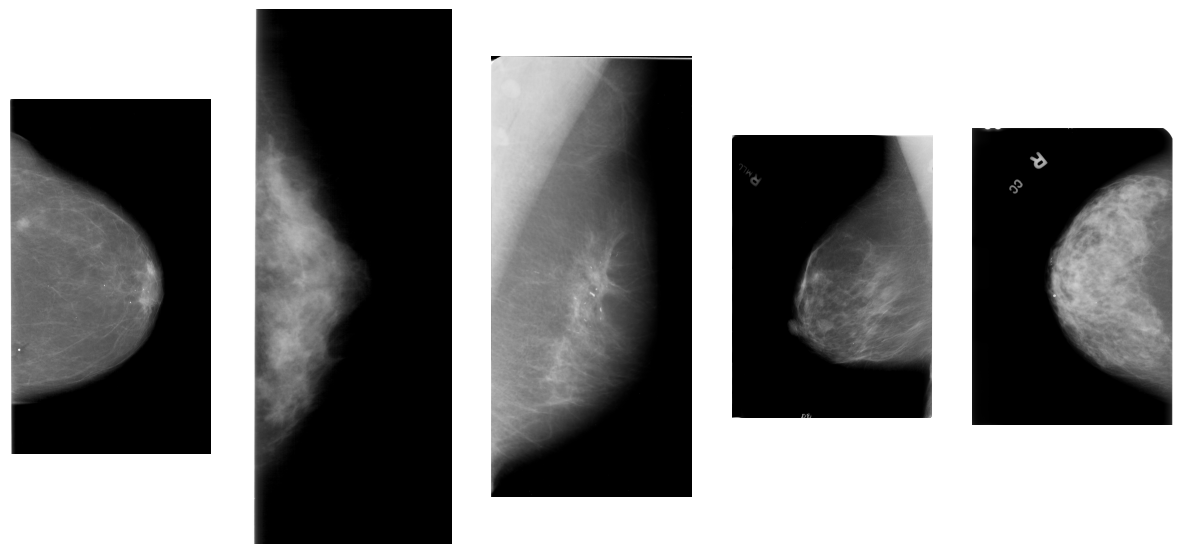

In [15]:
plot_smaples(full_mammogram)

In [16]:
roi_mask = replace_path(roi_mask, "CBIS-DDSM/jpeg", correct_dir)
print('\nROI Mask Images paths:')
print(roi_mask.iloc[0])


ROI Mask Images paths:
../content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


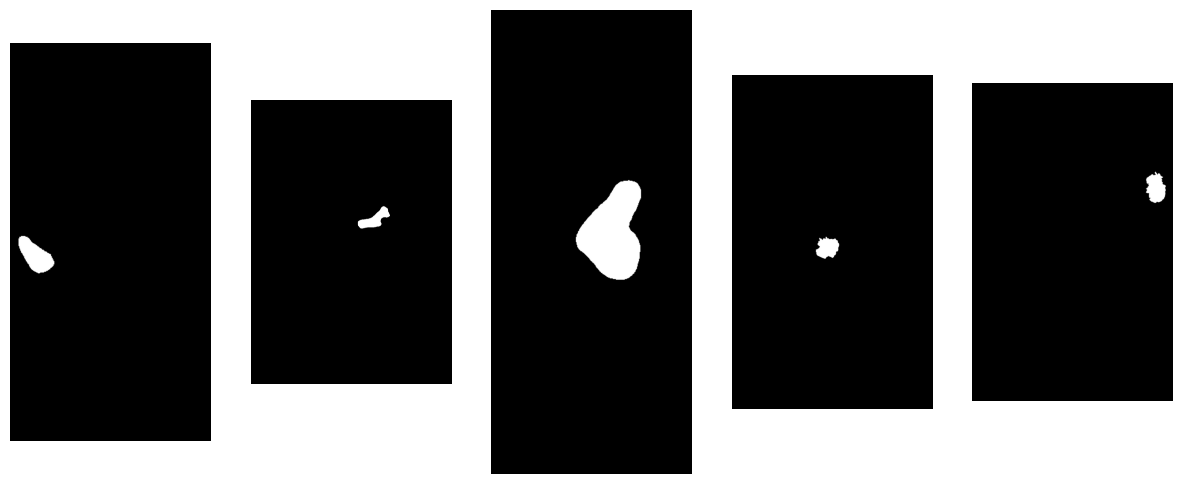

In [17]:
plot_smaples(roi_mask)

In [18]:
def get_image_file_name(data, new_dict):
    """
    /content
    /breast-cancer-detection
    /jpeg
    /1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304 [5]
    /1-172.jpg

    return path at index [5] after split depends on split('\')
    """
    for dicom in data:
        key = dicom.split('/')[6]
#        print(key)
        new_dict[key] = dicom
    print(f"the length of dataset ==> {len(new_dict.keys())}")

In [19]:
cropped_images_dict = dict()
full_mammo_dict = dict()
roi_img_dict = dict()

get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mammo_dict)
get_image_file_name(roi_mask, roi_img_dict)

the length of dataset ==> 3567
the length of dataset ==> 2857
the length of dataset ==> 3247


In [20]:
next(iter((cropped_images.items())))

(0,
 '../content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')

In [21]:
next(iter((cropped_images_dict.items())))
print()
print(len(cropped_images_dict.keys()))


3567


In [22]:
next(iter((full_mammo_dict.items())))
print()
print(len(full_mammo_dict.keys()))


2857


In [23]:
next(iter((roi_img_dict.items())))
print()
print(len(roi_img_dict.keys()))



3247


In [24]:
del cropped_images, full_mammogram, roi_mask;    gc.collect()

21770

In [25]:
def fix_image_path(data):
    """Correct dicom paths to correct image paths."""
    for indx, image in enumerate(data.values):
#         print(f"Image Path: {image[11]}")

        img_name = image[11].split('/')[2]
#         print(f"Looking for key: {img_name}")  # Debugging step

        if img_name in full_mammo_dict:
            data.iloc[indx, 11] = full_mammo_dict[img_name]
        else:
            data.iloc[indx, 11] = None
#             print(f"KeyError: '{img_name}' not found in full_mammo_dict")  # Debugging step

        img_name = image[12].split('/')[2]
        if img_name in cropped_images_dict:
            data.iloc[indx, 12] = cropped_images_dict[img_name]
        else:
            data.iloc[indx, 11] = None
            # print(f"KeyError: '{img_name}' not found in cropped_images_dict")  # Debugging step

        img_name = image[13].split('/')[2]
        if img_name in roi_img_dict:
            data.iloc[indx, 13] = roi_img_dict[img_name]

        else:
            data.iloc[indx, 13] = None

In [26]:
mass_test  = pd.read_csv("/content/breast_cancer_detection/datasets/CBIS-DDSM/csv/mass_case_description_test_set.csv")
mass_train  = pd.read_csv("/content/breast_cancer_detection/datasets/CBIS-DDSM/csv/mass_case_description_train_set.csv")

In [27]:
fix_image_path(mass_train)

In [28]:
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'image view': 'image_view',
                                        'abnormality id': 'abnormality_id',
                                        'abnormality type': 'abnormality_type',
                                        'mass shape': 'mass_shape',
                                        'mass margins': 'mass_margins',
                                        'image file path': 'image_file_path',
                                        'cropped image file path': 'cropped_image_file_path',
                                        'ROI mask file path': 'ROI_mask_file_path'})
mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...


In [29]:
fix_image_path(mass_test)

In [30]:
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
# view renamed columns
mass_test.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...,../content/breast_cancer_detection/datasets/CB...


In [31]:
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [32]:
calc_train = pd.read_csv("/content/breast_cancer_detection/datasets/CBIS-DDSM/csv/calc_case_description_train_set.csv")
calc_test  = pd.read_csv("/content/breast_cancer_detection/datasets/CBIS-DDSM/csv/calc_case_description_test_set.csv")

In [33]:
calc_train = calc_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'image view': 'image_view',
                                        'abnormality id': 'abnormality_id',
                                        'abnormality type': 'abnormality_type',
                                        'mass shape': 'mass_shape',
                                        'mass margins': 'mass_margins',
                                        'image file path': 'image_file_path',
                                        'cropped image file path': 'cropped_image_file_path',
                                        'ROI mask file path': 'ROI_mask_file_path'})
# view renamed columns
calc_train.head()

,patient_id,breast density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc type,calc distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [34]:
fix_image_path(calc_train)

In [35]:
calc_test = calc_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
# view renamed columns
calc_test.head()

,patient_id,breast density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc type,calc distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [36]:
fix_image_path(calc_test)

In [37]:
print(f'Shape of mass_train: {calc_train.shape}')
print(f'Shape of mass_test: {calc_test.shape}')

Shape of mass_train: (1546, 14)
Shape of mass_test: (326, 14)


In [38]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

def display_images(dataset, column, number):
    """Displays images in dataset, handling missing files and converting formats."""

    # create figure and axes
    fig, axes = plt.subplots(1, number, figsize=(15, 5))

    # Loop through rows and display images
    for index, (i, row) in enumerate(dataset.head(number).iterrows()):
        image_path = row[column]

       # Check if image_path is valid (not None) and exists
        if image_path is None or not os.path.exists(image_path):
            # print(f"File not found or invalid path: {image_path}")
            continue

        image = cv2.imread(image_path)

        # Handle case when image can't be read
        if image is None:
            # print(f"Error reading image: {image_path}")
            continue

        # Convert BGR to RGB if needed (for correct color display)
        if len(image.shape) == 3 and image.shape[2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax = axes[index]
        ax.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
        print(np.array(image).shape)

    plt.tight_layout()
    plt.show()

Full Mammograms:

(4808, 3024, 3)
(4800, 2656, 3)
(5491, 2986, 3)
(5491, 3046, 3)
(5491, 2911, 3)


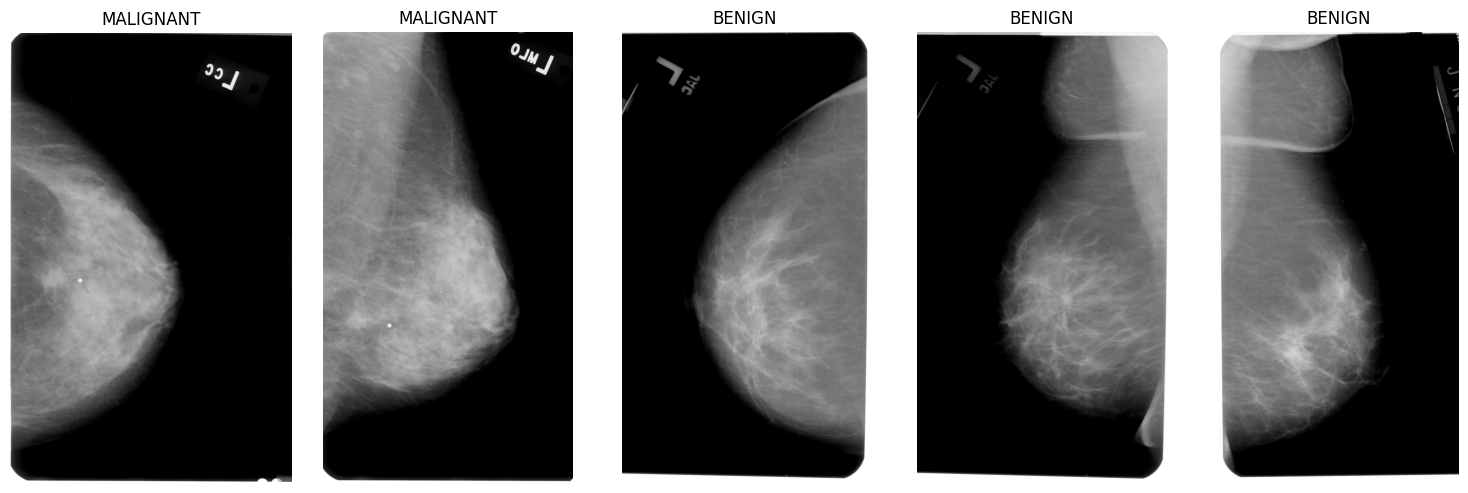

Cropped Mammograms:

(515, 431, 3)
(292, 256, 3)
(466, 423, 3)
(427, 422, 3)
(399, 465, 3)


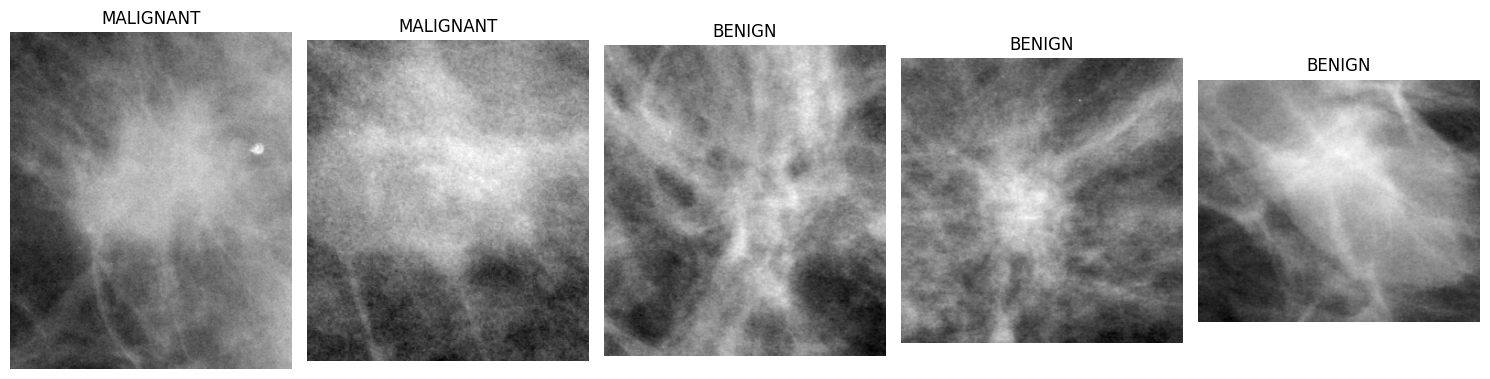

ROI_mask:

(4808, 3024, 3)
(4800, 2656, 3)
(5491, 2986, 3)
(5491, 3046, 3)
(5491, 2911, 3)


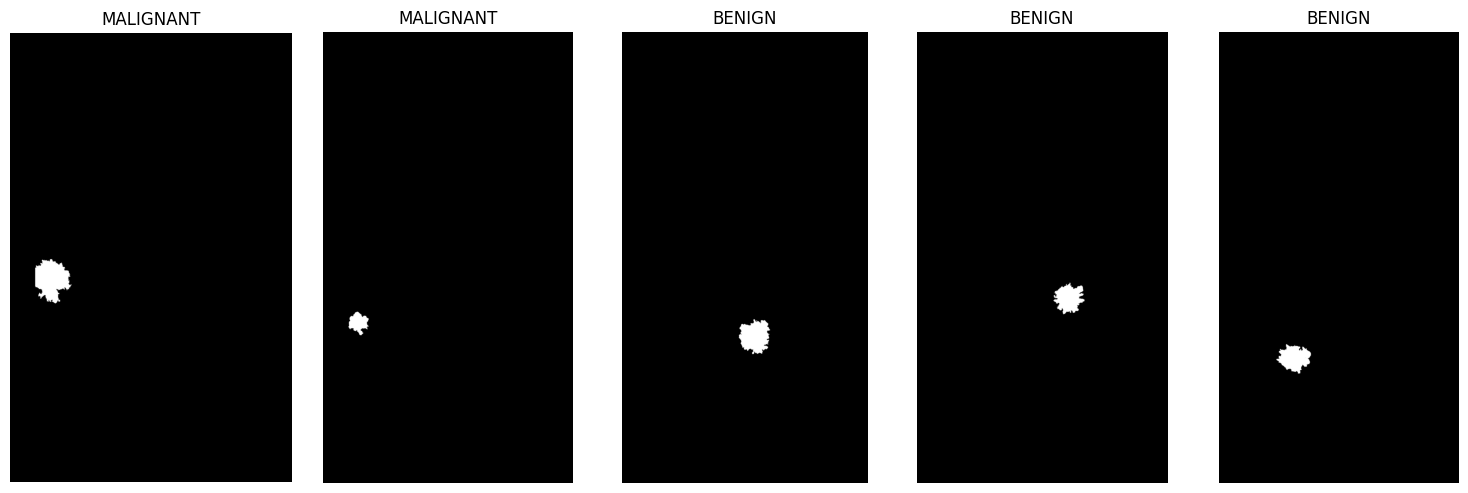

In [39]:
print('Full Mammograms:\n')
display_images(mass_train, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(mass_train, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(mass_train, 'ROI_mask_file_path', 5)

Full Mammograms:

(5056, 2761, 3)
(5386, 2836, 3)
(5356, 2986, 3)
(5491, 3166, 3)
(4568, 3064, 3)


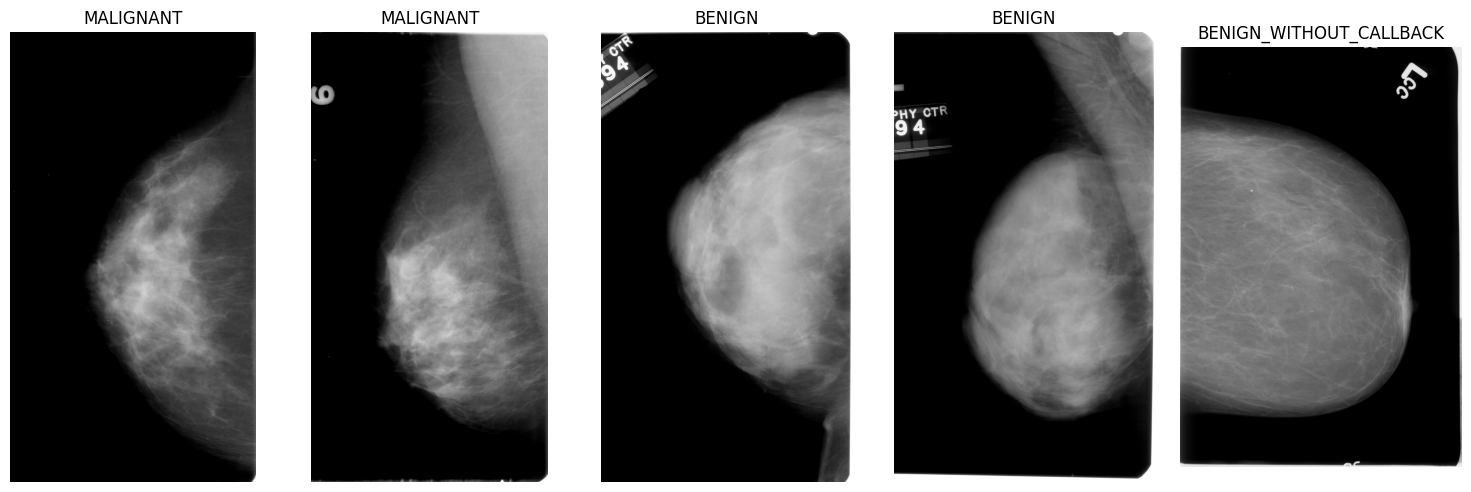

Cropped Mammograms:

(589, 677, 3)
(549, 681, 3)
(681, 577, 3)
(689, 761, 3)
(161, 177, 3)


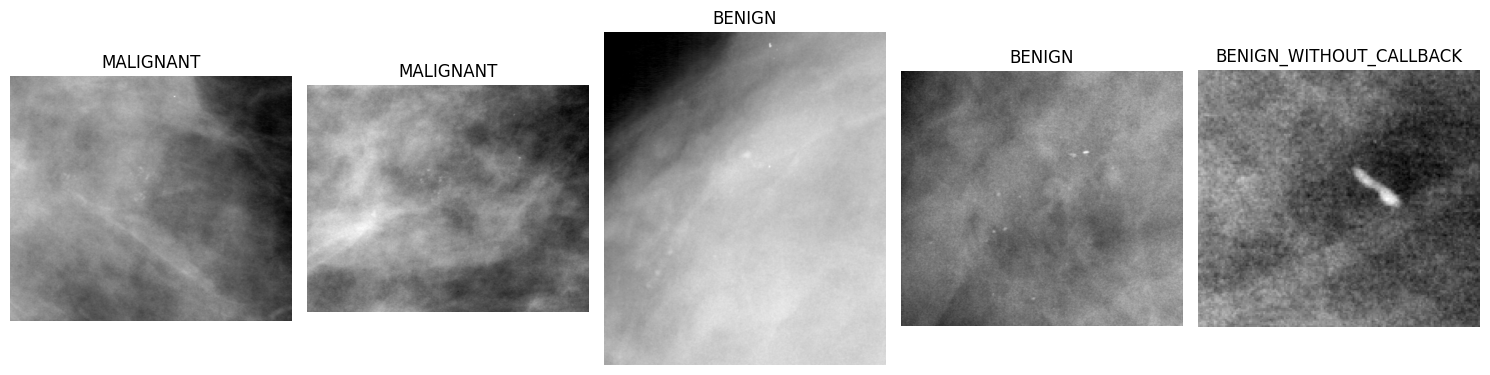

ROI_mask:

(5056, 2761, 3)
(5386, 2836, 3)
(5356, 2986, 3)
(5491, 3166, 3)
(4568, 3064, 3)


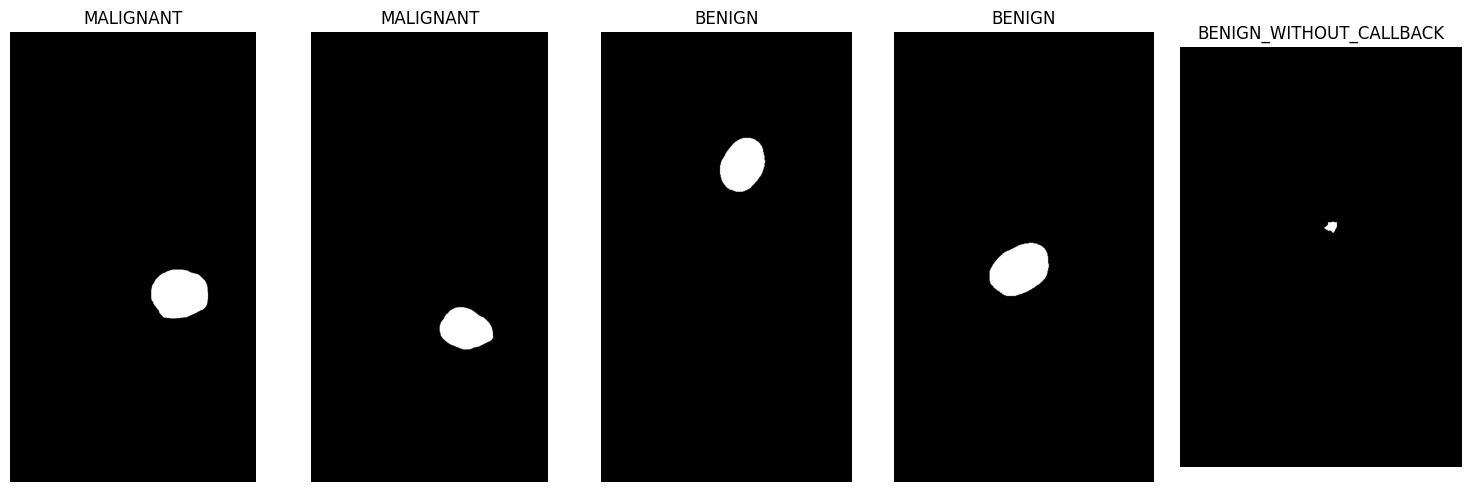

In [40]:
print('Full Mammograms:\n')
display_images(calc_train, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(calc_train, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(calc_train, 'ROI_mask_file_path', 5)

In [41]:
full_dataset = pd.concat([mass_train, mass_test, calc_train, calc_test], axis=0)
del mass_train, mass_test, calc_train, calc_test;    gc.collect()

10636

In [42]:
full_dataset.shape

(3568, 17)

In [43]:
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}
target_size = (224, 224, 3)

In [44]:
# Apply class mapper to pathology column
full_dataset['labels'] = full_dataset['pathology'].replace(class_mapper).infer_objects(copy=False)

full_images = np.array(full_dataset[full_dataset["image_file_path"].notna()]["image_file_path"].tolist())
full_labels = np.array(full_dataset[full_dataset["image_file_path"].notna()]["labels"].tolist())

<ipython-input-44-88e61f5e36a7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_dataset['labels'] = full_dataset['pathology'].replace(class_mapper).infer_objects(copy=False)


In [45]:
full_dataset['pathology'].value_counts()

,count
pathology,
MALIGNANT,1457
BENIGN,1429
BENIGN_WITHOUT_CALLBACK,682


In [46]:
len(full_images)

3284

In [47]:
import glob

breast_imgs = glob.glob("/content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/**/*.jpg", recursive=True)


In [48]:
len(breast_imgs)

10237

In [49]:
for imgname in breast_imgs[:5]:
    print(imgname)

/content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.94901026311616840612263927290971997989/1-228.jpg
/content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.94901026311616840612263927290971997989/2-229.jpg
/content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.168327394011718476608531224914261021644/1-185.jpg
/content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.290418661411413064827439218081759758021/1-259.jpg
/content/breast_cancer_detection/datasets/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.11155369213340314107640854320227057414/2-197.jpg


In [50]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0' :
        non_cancer_imgs.append(img)

    elif img[-5] == '1' :
        cancer_imgs.append(img)

In [51]:
non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer

total_img_num = non_cancer_num + cancer_num

print('Number of Images of no cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(cancer_num))   # images of cancer
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 1035
Number of Images of cancer : 1022
Total Number of Images : 2057


In [52]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [1035,1022]})

In [53]:
import plotly.express as px # import the plotly.express module and alias it as 'px'

data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [1035,1022]})

bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

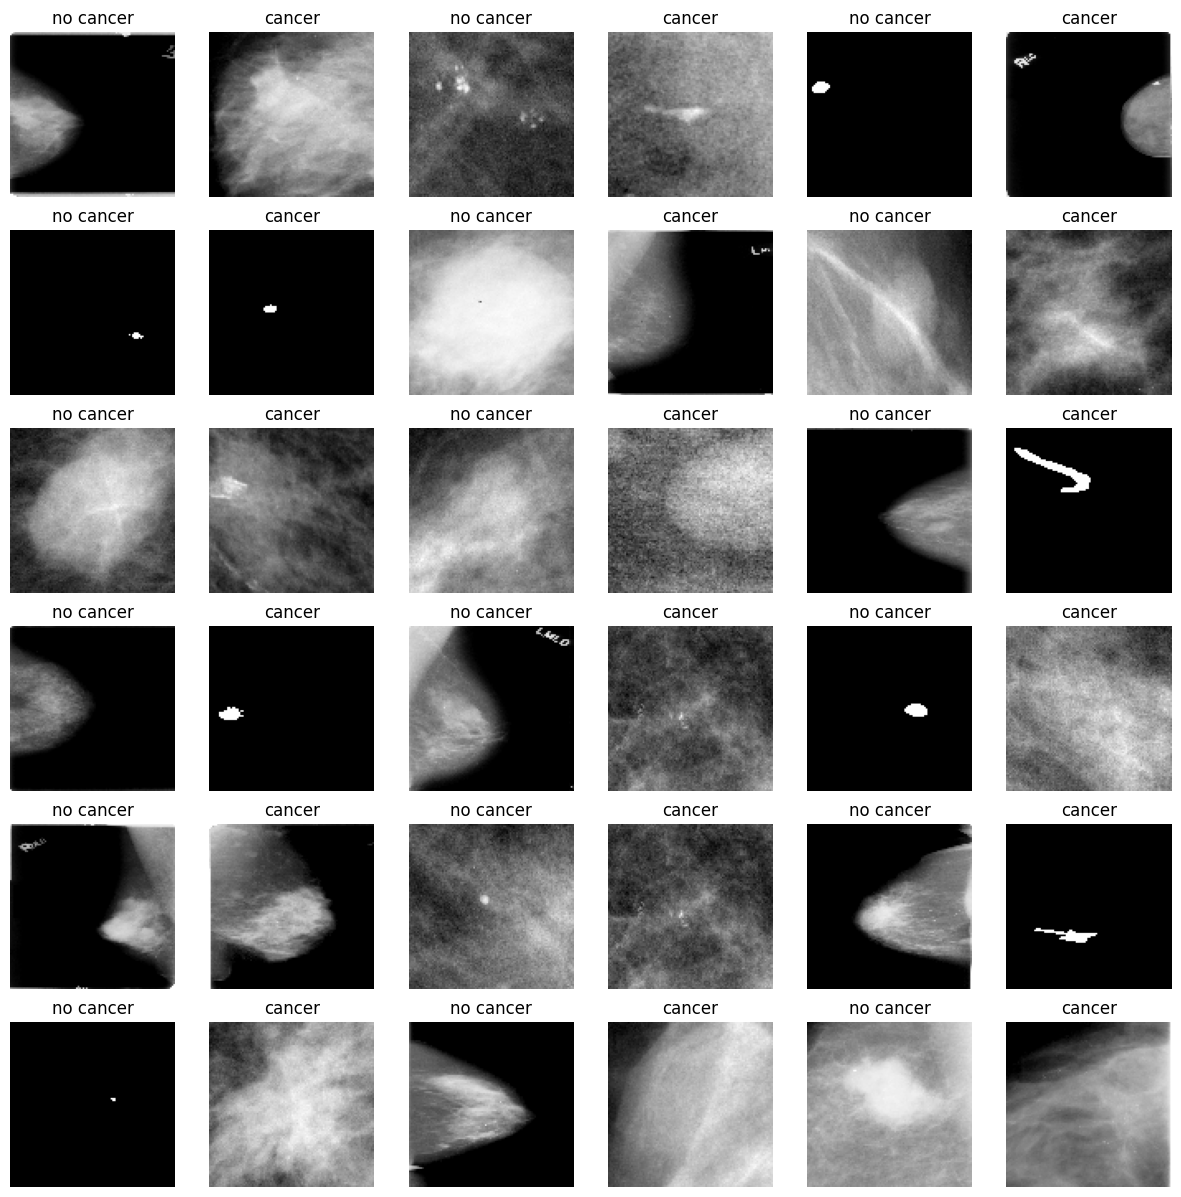

In [54]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array  # Import necessary functions

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_cancer_imgs), 18)
some_can = np.random.randint(0, len(cancer_imgs), 18)

s = 0
for num in some_non:
    img = load_img((non_cancer_imgs[num]), target_size=(100, 100))  # Use imported load_img
    img = img_to_array(img) # Use imported img_to_array
    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('no cancer')
    plt.imshow(img.astype('uint8'))
    s += 1
s = 1
for num in some_can:
    img = load_img((cancer_imgs[num]), target_size=(100, 100))  # Use imported load_img
    img = img_to_array(img)  # Use imported img_to_array
    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('cancer')
    plt.imshow(img.astype('uint8'))
    s += 1

In [55]:
import random
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.models as models

# Define a custom dataset class
class CancerDataset(Dataset):
    def __init__(self, image_data, transform=None):
        self.image_data = image_data
        self.transform = transform

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, idx):
        image, label = self.image_data[idx]

        # Convert to RGB if in BGR format (since OpenCV loads as BGR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Convert to PIL Image for torchvision transforms
        image = np.array(image)

        if self.transform:
            image = self.transform(image)

        return image, label

# Prepare the data from your existing code
# Randomly sample images from two lists
some_non_img = random.sample(non_cancer_imgs, len(non_cancer_imgs))
some_can_img = random.sample(cancer_imgs, len(cancer_imgs))

# Initialize empty lists to store image data and labels
combined_data = []

# Process non-cancer images
for img in some_non_img:
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (224, 224), interpolation=cv2.INTER_LINEAR)  # VGG16 expects 224x224
    combined_data.append([n_img_size, 0])

# Process cancer images
for img in some_can_img:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (224, 224), interpolation=cv2.INTER_LINEAR)  # VGG16 expects 224x224
    combined_data.append([c_img_size, 1])

# Shuffle the data
random.shuffle(combined_data)

# Define VGG16 pre-processing transforms
# VGG16 was trained on ImageNet with specific mean and std values
vgg_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset
cancer_dataset = CancerDataset(combined_data, transform=vgg_transforms)

# Split into train and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(cancer_dataset))
val_size = len(cancer_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(cancer_dataset, [train_size, val_size])

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Example of training setup (not full training code)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)


print(f"Dataset prepared with {len(train_dataset)} training samples and {len(val_dataset)} validation samples")
print(f"Model ready for training on {device}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.



Dataset prepared with 1645 training samples and 412 validation samples
Model ready for training on cuda:0


In [56]:
import torch
import torch.nn as nn
import torchvision.models as models

def create_vgg16(verbose=False, fc_size=256, dropout=None):
    """
    Creates a PyTorch model based on VGG16 with custom fully connected layers.

    Args:
        verbose (bool): Whether to print model summaries.
        fc_size (int): Size of the fully connected layer.
        dropout (float or None): Dropout rate. If None, no dropout is applied.

    Returns:
        torch.nn.Module: Modified VGG16 model.
    """
    # Load pretrained VGG16 model without classification head
    vgg16_base = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

    # Remove the original classifier
    features = vgg16_base.features

    # Freeze the convolutional base
    for param in features.parameters():
        param.requires_grad = False

    # Create a new sequential model
    vgg16 = nn.Sequential(
        features,
        nn.AdaptiveAvgPool2d((7, 7)),  # Same as VGG16's avgpool
        nn.Flatten(),
        nn.Linear(512 * 7 * 7, fc_size),
        nn.ReLU(inplace=True)
    )

    # Add dropout if specified
    if dropout is not None:
        vgg16.append(nn.Dropout(p=dropout))

    # Add final classification layer
    vgg16.append(nn.Linear(fc_size, 1))
    vgg16.append(nn.Sigmoid())

    if verbose:
        # Print model architecture
        print("VGG16 Base:")
        print(features)
        print("\nFull Model:")
        print(vgg16)

        # Print parameter counts
        total_params = sum(p.numel() for p in vgg16.parameters())
        trainable_params = sum(p.numel() for p in vgg16.parameters() if p.requires_grad)
        print(f"\nTotal parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")

    return vgg16

In [57]:
 # Create model with dropout
model = create_vgg16(verbose=True, fc_size=256, dropout=0.5)

VGG16 Base:
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 51

In [58]:
sample_input = torch.randn(1, 3, 150, 150)  # Batch size 1, 3 channels, 150x150 images
with torch.no_grad():
   output = model(sample_input)
print(f"\nOutput shape: {output.shape}")  # Should be [1, 1]


Output shape: torch.Size([1, 1])


In [64]:
! pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [59]:
from torchviz import make_dot
# Assuming vgg16_model is defined
vgg16_model = create_vgg16(verbose=True, fc_size=256, dropout=0.5)

# Create a sample input for the model
sample_input = torch.randn(1, 3, 224, 224)  # VGG16 expects 224x224 input

# Generate the visualization
visualization = make_dot(vgg16_model(sample_input), params=dict(vgg16_model.named_parameters()))

# Render and save the visualization
visualization.render("vgg16", format="png")

VGG16 Base:
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 51

'vgg16.png'

In [64]:
# Function to create VGG16 with custom final layer
def create_vgg16(verbose=False, fc_size=256, dropout=None):  # Add arguments here
    # Load pre-trained VGG16 model
    model = models.vgg16(pretrained=True) # This line was changed
    # Freeze all layers in the feature extractor
    for param in model.features.parameters():
        param.requires_grad = False

    # Replace the classifier for binary classification
    num_features = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_features, 1)  # Binary classification (1 output with sigmoid)

    return model

In [65]:
  # Create model
vgg16_model = create_vgg16()
vgg16_model = vgg16_model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.



In [66]:
# Early stopping implementation
class EarlyStopping:
    def __init__(self, patience=30, verbose=False, delta=0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss



In [67]:
import copy
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer,
                num_epochs=50, early_stopping_patience=30, device='cuda'):

    since = time.time()

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=early_stopping_patience, verbose=True, path='vgg16_fe_2cl_best.pt')

    # Best model tracker
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')

    # History tracker (similar to Keras history)
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                # Convert labels to float for BCE loss and reshape to [batch_size, 1]
                labels = labels.float().view(-1, 1).to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    # Apply sigmoid for binary classification
                    probs = torch.sigmoid(outputs)
                    preds = (probs > 0.5).float()
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            # Record history
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model if best validation loss
            if phase == 'val' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())

            # Early stopping check (only during validation phase)
            if phase == 'val':
                early_stopping(epoch_loss, model)

        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Loss: {best_loss:4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)

    # Save the final model
    torch.save(model.state_dict(), 'vgg16_fe_2cl_end.pt')

    # Save to Google Drive if available
    try:
        if os.path.exists('/content/gdrive/My Drive/models/'):
            torch.save(model.state_dict(), '/content/gdrive/My Drive/models/vgg16_fe_2cl_end.pt')
            # Also copy the best model
            import shutil
            shutil.copy('vgg16_fe_2cl_best.pt', '/content/gdrive/My Drive/models/vgg16_fe_2cl_best.pt')
            print("Models saved to Google Drive")
    except Exception as e:
        print(f"Could not save to Google Drive: {e}")

    return model, history

In [68]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Combines sigmoid and BCE
optimizer = optim.RMSprop(vgg16_model.parameters(), lr=0.001)

In [70]:
import time
# Train the model
trained_model, history = train_model(
    vgg16_model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    num_epochs=50,
    early_stopping_patience=30,
    device=device
)
print("Training finished!")

Epoch 1/50
----------
train Loss: 0.5491 Acc: 0.7301
val Loss: 0.8972 Acc: 0.4733
Validation loss decreased (inf --> 0.897169). Saving model...

Epoch 2/50
----------
train Loss: 0.4521 Acc: 0.7745
val Loss: 1.0215 Acc: 0.4854
EarlyStopping counter: 1 out of 30

Epoch 3/50
----------
train Loss: 0.4004 Acc: 0.8182
val Loss: 1.1435 Acc: 0.5024
EarlyStopping counter: 2 out of 30

Epoch 4/50
----------
train Loss: 0.3813 Acc: 0.8389
val Loss: 2.2428 Acc: 0.5000
EarlyStopping counter: 3 out of 30

Epoch 5/50
----------
train Loss: 0.3941 Acc: 0.8419
val Loss: 1.2083 Acc: 0.5316
EarlyStopping counter: 4 out of 30

Epoch 6/50
----------
train Loss: 0.3455 Acc: 0.8590
val Loss: 1.3944 Acc: 0.4757
EarlyStopping counter: 5 out of 30

Epoch 7/50
----------
train Loss: 0.3136 Acc: 0.8657
val Loss: 1.7573 Acc: 0.4684
EarlyStopping counter: 6 out of 30

Epoch 8/50
----------
train Loss: 0.2781 Acc: 0.8906
val Loss: 1.4371 Acc: 0.5024
EarlyStopping counter: 7 out of 30

Epoch 9/50
----------
train L

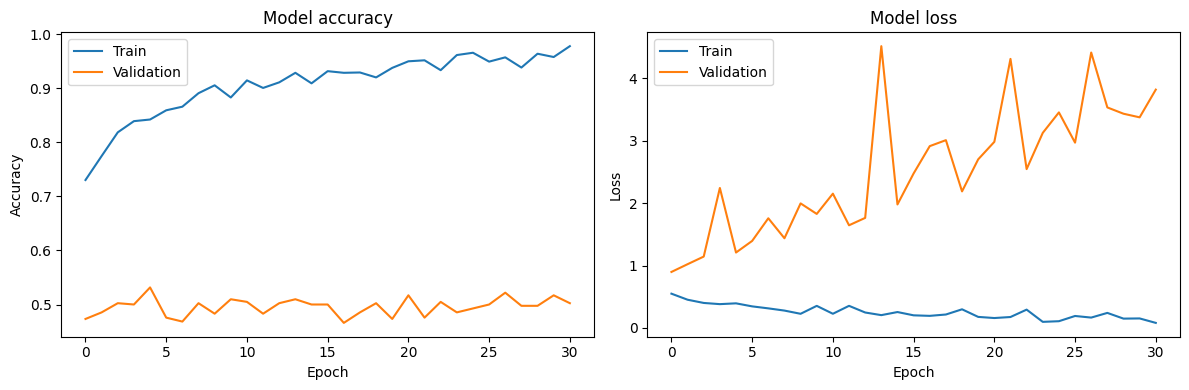

In [71]:
# Plotting training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'])
plt.plot(history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['train_loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()